Hypothesis Testing steps
→Set null and alternative
hypotheses
→Choose test statistic
→Calculate the test statistic
→Determine the P-value
associated with the test
statistic
→Use P-value to prove or reject
hypothesis
INFERENCE
INTRO TO HYPOTHESIS TESTING


# Group Project 2

1. Erica Holden, 5490685
2. Yu-Chen Chou (Tracy), 9006160
3. Reham Omar Hussein Abuarqoub, 9062922

To run the cells in this notebook, you will need to have installed the following packages:
- pandas
- numpy
- statistics
- matplotlib
- matplotlib-venn

## Import libraries


In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler

## 🧪 Hypothesis Testing Summary

---

### 💡 1. Diabetes Dataset

**Variable Analyzed**: `BMI`  
**Groups Compared**: Physically Active vs Inactive Individuals  
**Test Type**: Two-tailed Independent t-test

- **Null Hypothesis (H₀)**:  
  There is **no significant difference** in the mean BMI between physically active and inactive individuals.  
  \[
  H_0: \mu_{\text{active}} = \mu_{\text{inactive}}
  \]

- **Alternative Hypothesis (H₁)**:  
  There **is** a significant difference in the mean BMI between physically active and inactive individuals.  
  \[
  H_1: \mu_{\text{active}} \ne \mu_{\text{inactive}}
  \]

---

### 💡 2. Heart Disease Dataset

**Variable Analyzed**: `thalach` (maximum heart rate)  
**Groups Compared**: Males vs Females  
**Test Type**: Two-tailed Independent t-test

- **Null Hypothesis (H₀)**:  
  There is **no significant difference** in the mean max heart rate (`thalach`) between males and females.  
  \[
  H_0: \mu_{\text{male}} = \mu_{\text{female}}
  \]

- **Alternative Hypothesis (H₁)**:  
  There **is** a significant difference in the mean max heart rate (`thalach`) between males and females.  
  \[
  H_1: \mu_{\text{male}} \ne \mu_{\text{female}}
  \]

---

### 📊 Summary Table

| Dataset           | Variable   | Group 1       | Group 2       | Null Hypothesis (H₀)     | Alternative Hypothesis (H₁) |
|------------------|------------|---------------|---------------|----------------------------|------------------------------|
| Diabetes          | BMI        | Active        | Inactive      | μ₁ = μ₂                    | μ₁ ≠ μ₂                      |
| Heart Disease     | Thalach    | Male          | Female        | μ₁ = μ₂                    | μ₁ ≠ μ₂                      |

---



C:\Users\RAJEH\AppData\Local\Temp\ipykernel_22952\1441820512.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_viz, x='PhysicalActivity', y='BMI', palette='Set2')


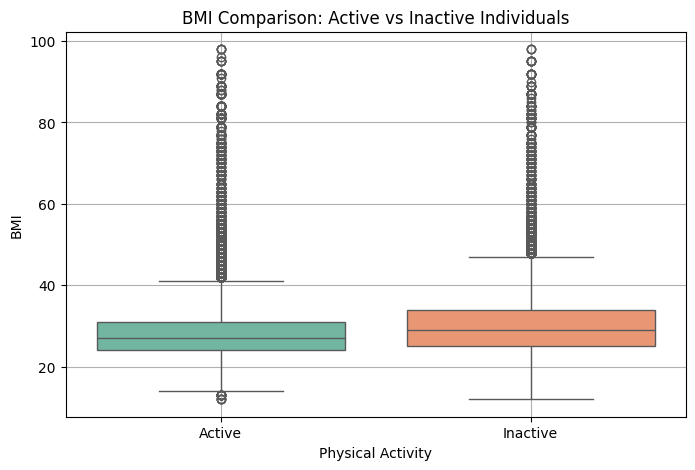

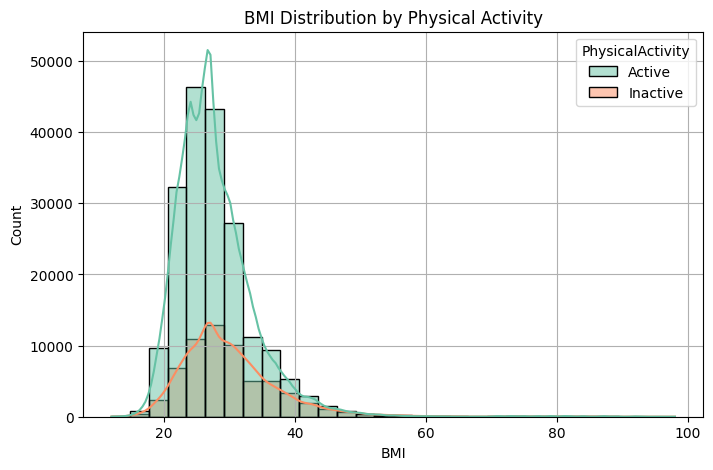

In [18]:
# Prepare the data for visualization using existing DataFrames
active_viz = active[['BMI']].copy()
active_viz['PhysicalActivity'] = 'Active'

inactive_viz = inactive[['BMI']].copy()
inactive_viz['PhysicalActivity'] = 'Inactive'

df_viz = pd.concat([active_viz, inactive_viz], ignore_index=True)

# 🔷 Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_viz, x='PhysicalActivity', y='BMI', palette='Set2')
plt.title('BMI Comparison: Active vs Inactive Individuals')
plt.ylabel('BMI')
plt.xlabel('Physical Activity')
plt.grid(True)
plt.show()

# 🔶 Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df_viz, x='BMI', hue='PhysicalActivity', kde=True, palette='Set2', bins=30)
plt.title('BMI Distribution by Physical Activity')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.grid(True)
plt.show()


C:\Users\RAJEH\AppData\Local\Temp\ipykernel_22952\2919524021.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_heart_viz, x='Sex', y='thalach', palette='Set1')


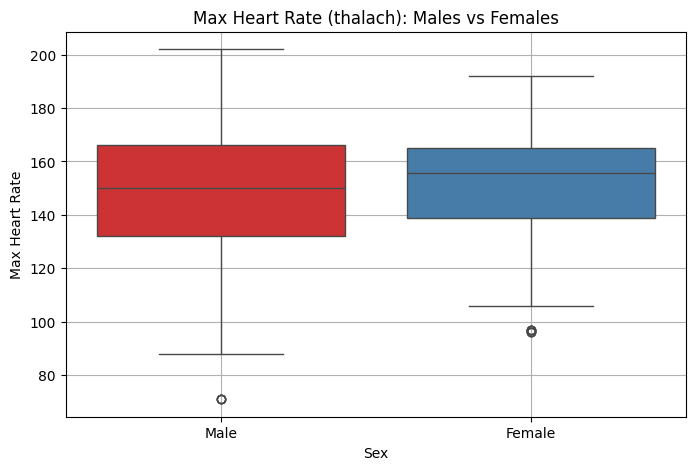

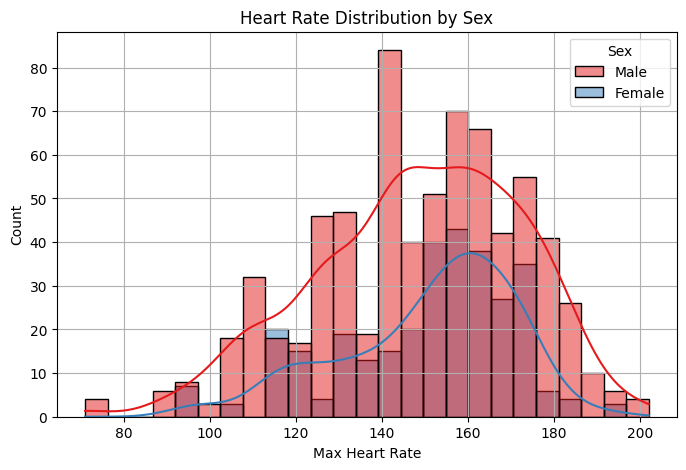

In [20]:
# Prepare the data using the already loaded 'heart' DataFrame
df_heart_viz = heart[heart['sex'].isin([0, 1])][['thalach', 'sex']]
df_heart_viz['Sex'] = df_heart_viz['sex'].map({1: 'Male', 0: 'Female'})

# 🔷 Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_heart_viz, x='Sex', y='thalach', palette='Set1')
plt.title('Max Heart Rate (thalach): Males vs Females')
plt.ylabel('Max Heart Rate')
plt.xlabel('Sex')
plt.grid(True)
plt.show()

# 🔶 Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df_heart_viz, x='thalach', hue='Sex', kde=True, palette='Set1', bins=25)
plt.title('Heart Rate Distribution by Sex')
plt.xlabel('Max Heart Rate')
plt.ylabel('Count')
plt.grid(True)
plt.show()


Z-Statistic: 71.714, P-value: 0.00000
